<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/CDD_ML_bioactivity_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery**

Let's build a machine learning model using the ChEMBL bioactivity data.
credit to @Data Professor


## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of February 22, 2024].

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [90]:
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
     |████████████████████████████████| 670 kB 4.9 MB/s 
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)


## **Importing libraries**

In [91]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
pd.set_option('display.max_columns', None)

## **Search for Target protein**

### **Target search for coronavirus**

In [94]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   
5                                                 []   
6  [{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...   
7                                                 []   
8  [{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...   
9                                                 []   

                                            organism  \
0                                        Coronavirus   
1                                   SARS coronavirus   
2                                 Feline coronavirus   
3                                 Murine coronavirus   
4                             Human coronavirus 229E   
5                             Human coronavirus OC43   
6                                   SARS coronavirus   
7  Middle East respiratory syndrome-related coron...   
8                                   SARS coronavirus   
9    Severe acute respiratory syndrome coronavirus 2   

                                           pref_name  score  \
0                                        Coronavirus   17.0   
1                                   SARS coronavirus   14.0   
2                                 Feline coronavirus   14.0   
3                                 Murine coronavirus   14.0   
4                             Human coronavirus 229E   12.0   
5                             Human coronavirus OC43   12.0   
6                SARS coronavirus 3C-like proteinase   10.0   
7  Middle East respiratory syndrome-related coron...    9.0   
8                          Replicase polyprotein 1ab    4.0   
9                          Replicase polyprotein 1ab    4.0   

   species_group_flag target_chembl_id  \
0               False     CHEMBL613732   
1               False     CHEMBL612575   
2               False     CHEMBL612744   
3               False    CHEMBL5209664   
4               False     CHEMBL613837   
5               False    CHEMBL5209665   
6               False       CHEMBL3927   
7               False    CHEMBL4296578   
8               False       CHEMBL5118   
9               False    CHEMBL4523582   

                                   target_components     target_type   tax_id  
0                                                 []        ORGANISM    11119  
1                                                 []        ORGANISM   227859  
2                                                 []        ORGANISM    12663  
3                                                 []        ORGANISM   694005  
4                                                 []        ORGANISM    11137  
5                                                 []        ORGANISM    31631  
6  [{'accession': 'P0C6U8', 'component_descriptio...  SINGLE PROTEIN   227859  
7                                                 []        ORGANISM  1335626  
8  [{'accession': 'P0C6X7', 'component_descriptio...  SINGLE PROTEIN   227859  
9  [{'accession': 'P0DTD1', 'component_descriptio...  SINGLE PROTEIN  2697049

### **Select and retrieve bioactivity data for *SARS coronavirus 3C-like proteinase**

We will assign the fifth entry (which corresponds to the target protein, *coronavirus 3C-like proteinase*) to the ***selected_target*** variable

In [95]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

Here, we will retrieve only bioactivity data for *coronavirus 3C-like proteinase* (CHEMBL3927) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [8]:
df = pd.DataFrame.from_dict(res)

In [9]:
'''
IC50 indicates the potency of the drug to the target. The lower value of the IC50 indicates the better potency
It is because IC50 indicates the half inhibitory value of the drug concentration we need to inhibit a target.
So the lower concentration of the drug we use, the better drug it is
'''
df.head(3)

action_type activity_comment  activity_id activity_properties  \
0        None             None      1480935                  []   
1        None             None      1480936                  []   
2        None             None      1481061                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL829584  In vitro inhibitory concentration against SARS...   
1    CHEMBL829584  In vitro inhibitory concentration against SARS...   
2    CHEMBL830868  In vitro inhibitory concentration against SARS...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0          B                    None                   None  BAO_0000190   
1          B                    None                   None  BAO_0000190   
2          B                    None                   None  BAO_0000190   

    bao_format              bao_label  \
0  BAO_0000357  single protein format   
1  BAO_0000357  single protein format   
2  BAO_0000357  single protein format   

                          canonical_smiles data_validity_comment  \
0   Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21                  None   
1   O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21                  None   
2  O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21                  None   

  data_validity_description document_chembl_id      document_journal  \
0                      None      CHEMBL1139624  Bioorg Med Chem Lett   
1                      None      CHEMBL1139624  Bioorg Med Chem Lett   
2                      None      CHEMBL1139624  Bioorg Med Chem Lett   

   document_year                                  ligand_efficiency  \
0           2005  {'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...   
1           2005  {'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...   
2           2005  {'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...   

  molecule_chembl_id molecule_pref_name parent_molecule_chembl_id  \
0       CHEMBL187579               None              CHEMBL187579   
1       CHEMBL188487               None              CHEMBL188487   
2       CHEMBL185698               None              CHEMBL185698   

  pchembl_value  potential_duplicate  \
0          5.14                    0   
1          5.03                    0   
2          4.87                    0   

                                  qudt_units  record_id relation  src_id  \
0  http://www.openphacts.org/units/Nanomolar     384103        =       1   
1  http://www.openphacts.org/units/Nanomolar     383984        =       1   
2  http://www.openphacts.org/units/Nanomolar     384106        =       1   

   standard_flag standard_relation standard_text_value standard_type  \
0              1                 =                None          IC50   
1              1                 =                None          IC50   
2              1                 =                None          IC50   

  standard_units standard_upper_value standard_value target_chembl_id  \
0             nM                 None         7200.0       CHEMBL3927   
1             nM                 None         9400.0       CHEMBL3927   
2             nM                 None        13500.0       CHEMBL3927   

    target_organism                     target_pref_name target_tax_id  \
0  SARS coronavirus  SARS coronavirus 3C-like proteinase        227859   
1  SARS coronavirus  SARS coronavirus 3C-like proteinase        227859   
2  SARS coronavirus  SARS coronavirus 3C-like proteinase        227859   

  text_value  toid  type units    uo_units upper_value value  
0       None  None  IC50    uM  UO_0000065        None   7.2  
1       None  None  IC50    uM  UO_0000065        None   9.4  
2       None  None  IC50    uM  UO_0000065        None  13.5

In [10]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [11]:
df.to_csv('bioactivity_data.csv', index=False)

## **Copying files to Google Drive**

Firstly, we need to mount the Google Drive into Colab so that we can have access to our Google adrive from within Colab.

In [12]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


Next, we create a **data** folder in our **Colab Notebooks** folder on Google Drive.

In [13]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data’: File exists


In [14]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [15]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

total 78
-rw------- 1 root root 68403 Feb 22 20:15 bioactivity_data.csv
-rw------- 1 root root 10341 Nov  5 19:27 bioactivity_preprocessed_data.csv


Let's see the CSV files that we have so far.

In [16]:
! ls

bioactivity_data.csv  gdrive  sample_data


Taking a glimpse of the **bioactivity_data.csv** file that we've just created.

In [17]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [18]:
df2 = df[df.standard_value.notna()]
df2

action_type activity_comment  activity_id activity_properties  \
0          None             None      1480935                  []   
1          None             None      1480936                  []   
2          None             None      1481061                  []   
3          None             None      1481065                  []   
4          None             None      1481066                  []   
..          ...              ...          ...                 ...   
128        None             None     12041507                  []   
129        None             None     12041508                  []   
130        None             None     12041509                  []   
131        None             None     12041510                  []   
132        None             None     12041511                  []   

    assay_chembl_id                                  assay_description  \
0      CHEMBL829584  In vitro inhibitory concentration against SARS...   
1      CHEMBL829584  In vitro inhibitory concentration against SARS...   
2      CHEMBL830868  In vitro inhibitory concentration against SARS...   
3      CHEMBL829584  In vitro inhibitory concentration against SARS...   
4      CHEMBL829584  In vitro inhibitory concentration against SARS...   
..              ...                                                ...   
128   CHEMBL2150313  Inhibition of SARS-CoV PLpro expressed in Esch...   
129   CHEMBL2150313  Inhibition of SARS-CoV PLpro expressed in Esch...   
130   CHEMBL2150313  Inhibition of SARS-CoV PLpro expressed in Esch...   
131   CHEMBL2150313  Inhibition of SARS-CoV PLpro expressed in Esch...   
132   CHEMBL2150313  Inhibition of SARS-CoV PLpro expressed in Esch...   

    assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0            B                    None                   None  BAO_0000190   
1            B                    None                   None  BAO_0000190   
2            B                    None                   None  BAO_0000190   
3            B                    None                   None  BAO_0000190   
4            B                    None                   None  BAO_0000190   
..         ...                     ...                    ...          ...   
128          B                    None                   None  BAO_0000190   
129          B                    None                   None  BAO_0000190   
130          B                    None                   None  BAO_0000190   
131          B                    None                   None  BAO_0000190   
132          B                    None                   None  BAO_0000190   

      bao_format              bao_label  \
0    BAO_0000357  single protein format   
1    BAO_0000357  single protein format   
2    BAO_0000357  single protein format   
3    BAO_0000357  single protein format   
4    BAO_0000357  single protein format   
..           ...                    ...   
128  BAO_0000019           assay format   
129  BAO_0000019           assay format   
130  BAO_0000019           assay format   
131  BAO_0000019           assay format   
132  BAO_0000019           assay format   

                                      canonical_smiles data_validity_comment  \
0               Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21                  None   
1               O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21                  None   
2              O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21                  None   
3                  O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21                  None   
4      O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]                  None   
..                                                 ...                   ...   
128  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...                  None   
129        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C                  None   
130             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12                  None   
131      Cc1cccc2c3c(ccc12)C1=C(

Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [19]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Iterate the *molecule_chembl_id* to a list**

In [20]:
# df2.molecule_chembl_id

0       CHEMBL187579
1       CHEMBL188487
2       CHEMBL185698
3       CHEMBL426082
4       CHEMBL187717
           ...      
128    CHEMBL2146517
129     CHEMBL187460
130     CHEMBL363535
131     CHEMBL227075
132      CHEMBL45830
Name: molecule_chembl_id, Length: 133, dtype: object

In [21]:
# mol_cid = []
# for i in df2.molecule_chembl_id:
#   mol_cid.append(i)

In [22]:
# mol_cid

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983',
 'CHEMBL191575',
 'CHEMBL370923',
 'CHEMBL194398',
 'CHEMBL196635',
 'CHEMBL209287',
 'CHEMBL358279',
 'CHEMBL348660',
 'CHEMBL379727',
 'CHEMBL210525',
 'CHEMBL148483',
 'CHEMBL383725',
 'CHEMBL118596',
 'CHEMBL208732',
 'CHEMBL208732',
 'CHEMBL210146',
 'CHEMBL210146',
 'CHEMBL207458',
 'CHEMBL207458',
 'CHEMBL207484',
 'CHEMBL207484',
 'CHEMBL207207',
 'CHEMBL207207',
 'CHEMBL210487',
 'CHEMBL210487',
 'CHEMBL380470',
 'CHEMBL380470',
 'CHEMBL210612',
 'CHEMBL210612',
 'CHEMBL209667',
 'CHEMBL209667',
 'CHEMBL210097',
 'CHEMBL210097',
 'CHEMBL378674',
 'CHEMBL378674',
 'CHEMBL210216',
 'CHEMBL210216',
 'CHEMBL210195',
 'CHEMBL210195',
 'CHEMBL210437',
 'CHEMBL210437',
 'CHEMBL378677',
 'CHEMBL378677',
 'CHEMBL210972',
 'CHEMBL210972',
 'CHEMBL210145',
 'CHEMBL210145',
 'CHEMBL377225',
 'CHEMBL377225',
 'CHEMBL210823

### **Iterate *canonical_smiles* to a list**

In [ ]:
# canonical_smiles = []
# for i in df2.canonical_smiles:
#   canonical_smiles.append(i)

### **Iterate *standard_value* to a list**

In [ ]:
# standard_value = []
# for i in df2.standard_value:
#   standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [ ]:
# data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
# df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
# df3

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    standard_value  
0           7200.0  
1           9400.0  
2          13500.0  
3          13110.0  
4           2000.0  
..             ...  
128        10600.0  
129        10100.0  
130        11500.0  
131        10700.0  
132        78900.0  

[133 rows x 3 columns]

### **Alternative method**

In [23]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2[selection]
df3

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    standard_value  
0           7200.0  
1           9400.0  
2          13500.0  
3          13110.0  
4           2000.0  
..             ...  
128        10600.0  
129        10100.0  
130        11500.0  
131        10700.0  
132        78900.0  

[133 rows x 3 columns]

In [24]:
# dataframe with new column that represent the drug IC50 inhibitory activity
df4 = pd.concat([df3,pd.Series(bioactivity_class)], axis=1)
df4

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    standard_value             0  
0           7200.0  intermediate  
1           9400.0  intermediate  
2          13500.0      inactive  
3          13110.0      inactive  
4           2000.0  intermediate  
..             ...           ...  
128        10600.0      inactive  
129        10100.0      inactive  
130        11500.0      inactive  
131        10700.0      inactive  
132        78900.0      inactive  

[133 rows x 4 columns]

Saves dataframe to CSV file

In [25]:
df4.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [26]:
! ls -l

total 88
-rw-r--r-- 1 root root 68403 Feb 22 20:14 bioactivity_data.csv
-rw-r--r-- 1 root root 10341 Feb 22 20:54 bioactivity_preprocessed_data.csv
drwx------ 5 root root  4096 Feb 22 20:15 gdrive
drwxr-xr-x 1 root root  4096 Feb 21 14:21 sample_data


Let's copy to the Google Drive

In [27]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [28]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


In [29]:
df4

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    standard_value             0  
0           7200.0  intermediate  
1           9400.0  intermediate  
2          13500.0      inactive  
3          13110.0      inactive  
4           2000.0  intermediate  
..             ...           ...  
128        10600.0      inactive  
129        10100.0      inactive  
130        11500.0      inactive  
131        10700.0      inactive  
132        78900.0      inactive  

[133 rows x 4 columns]

---

## Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis

# Install conda and rdkit

In [30]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-02-22 20:58:36--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   130MB/s    in 0.6s    

2024-02-22 20:58:37 (130 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [31]:
import pandas as pd

In [134]:
df = pd.read_csv('/content/sample_data/bioactivity_preprocessed_data.csv')

##Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton

Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

## Import libraries

In [135]:
#! pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [136]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# function to compute the molecular descriptives from chemical atomic structure

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [137]:
df_lipinski = lipinski(df.canonical_smiles)

In [138]:
# MW: molecular weight;
# LogP: solubility;
# NumHDonors: relative number of Hydrogen donors;
# NumHAcceptors:relative number of hydrogen acceptors

df_lipinski

MW     LogP  NumHDonors  NumHAcceptors
0    281.271  1.89262         0.0            5.0
1    415.589  3.81320         0.0            2.0
2    421.190  2.66050         0.0            4.0
3    293.347  3.63080         0.0            3.0
4    338.344  3.53900         0.0            5.0
..       ...      ...         ...            ...
128  338.359  3.40102         0.0            5.0
129  296.366  3.44330         0.0            3.0
130  276.291  4.09564         0.0            3.0
131  278.307  3.29102         0.0            3.0
132  282.383  4.10530         0.0            2.0

[133 rows x 4 columns]

In [139]:
df.rename(columns={'0':'bioactivity_class'}, inplace=True)
df

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

     standard_value bioactivity_class  
0            7200.0      intermediate  
1            9400.0      intermediate  
2           13500.0          inactive  
3           13110.0          inactive  
4            2000.0      intermediate  
..              ...               ...  
128         10600.0          inactive  
129         10100.0          inactive  
130         11500.0          inactive  
131         10700.0          inactive  
132         78900.0          inactive  

[133 rows x 4 columns]

In [140]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [141]:
df_combined

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

     standard_value bioactivity_class       MW     LogP  NumHDonors  \
0            7200.0      intermediate  281.271  1.89262         0.0   
1            9400.0      intermediate  415.589  3.81320         0.0   
2           13500.0          inactive  421.190  2.66050         0.0   
3           13110.0          inactive  293.347  3.63080         0.0   
4            2000.0      intermediate  338.344  3.53900         0.0   
..              ...               ...      ...      ...         ...   
128         10600.0          inactive  338.359  3.40102         0.0   
129         10100.0          inactive  296.366  3.44330         0.0   
130         11500.0          inactive  276.291  4.09564         0.0   
131         10700.0          inactive  278.307  3.29102         0.0   
132         78900.0          inactive  282.383  4.10530         0.0   

     NumHAcceptors  
0              5.0  
1              2.0  
2              4.0  
3              3.0  
4              5.0  
..             ...  
128            5.0  
129            3.0  
130            3.0  
131            3.0  
132            2.0  

[133 rows x 8 columns]

##Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10<sup>−9</sup>
* Take the molar value and apply -log10
* Delete the standard_value column and create a new pIC50 column

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [142]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [143]:
df_combined.standard_value.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [144]:
-np.log10( (10**-9)* 100000000 )

1.0

In [145]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [146]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [147]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-146-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    bioactivity_class       MW     LogP  NumHDonors  NumHAcceptors  \
0        intermediate  281.271  1.89262         0.0            5.0   
1        intermediate  415.589  3.81320         0.0            2.0   
2            inactive  421.190  2.66050         0.0            4.0   
3            inactive  293.347  3.63080         0.0            3.0   
4        intermediate  338.344  3.53900         0.0            5.0   
..                ...      ...      ...         ...            ...   
128          inactive  338.359  3.40102         0.0            5.0   
129          inactive  296.366  3.44330         0.0            3.0   
130          inactive  276.291  4.09564         0.0            3.0   
131          inactive  278.307  3.29102         0.0            3.0   
132          inactive  282.383  4.10530         0.0            2.0   

     standard_value_norm  
0                 7200.0  
1                 9400.0  
2                13500.0  
3                13110.0  
4                 2000.0  
..                   ...  
128              10600.0  
129              10100.0  
130              11500.0  
131              10700.0  
132              78900.0  

[133 rows x 8 columns]

In [148]:
df_norm.standard_value_norm.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [149]:
df_final = pIC50(df_norm)
df_final

<ipython-input-142-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL187579             Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21   
1         CHEMBL188487             O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21   
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
4         CHEMBL187717    O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    bioactivity_class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
0        intermediate  281.271  1.89262         0.0            5.0  5.142668  
1        intermediate  415.589  3.81320         0.0            2.0  5.026872  
2            inactive  421.190  2.66050         0.0            4.0  4.869666  
3            inactive  293.347  3.63080         0.0            3.0  4.882397  
4        intermediate  338.344  3.53900         0.0            5.0  5.698970  
..                ...      ...      ...         ...            ...       ...  
128          inactive  338.359  3.40102         0.0            5.0  4.974694  
129          inactive  296.366  3.44330         0.0            3.0  4.995679  
130          inactive  276.291  4.09564         0.0            3.0  4.939302  
131          inactive  278.307  3.29102         0.0            3.0  4.970616  
132          inactive  282.383  4.10530         0.0            2.0  4.102923  

[133 rows x 8 columns]

In [181]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv', index=False)

In [150]:
df_final.pIC50.describe()

count    133.000000
mean       4.718269
std        0.920910
min        3.000000
25%        4.154902
50%        4.756962
75%        4.995679
max        7.301030
Name: pIC50, dtype: float64

##Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [151]:
print(df_final.columns)

Index(['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')


In [152]:
df_two_class = df_final[df_final.bioactivity_class != 'intermediate']
df_two_class

molecule_chembl_id                                   canonical_smiles  \
2         CHEMBL185698            O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21   
3         CHEMBL426082                O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21   
5         CHEMBL365134            O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21   
7         CHEMBL190743             O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21   
8         CHEMBL365469            O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21   
..                 ...                                                ...   
128      CHEMBL2146517  COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...   
129       CHEMBL187460        C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C   
130       CHEMBL363535             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12   
131       CHEMBL227075      Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1   
132        CHEMBL45830             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C   

    bioactivity_class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
2            inactive  421.190  2.66050         0.0            4.0  4.869666  
3            inactive  293.347  3.63080         0.0            3.0  4.882397  
5              active  372.243  4.39330         0.0            3.0  6.008774  
7              active  419.243  4.23540         0.0            3.0  6.022276  
8            inactive  327.792  4.28420         0.0            3.0  4.950782  
..                ...      ...      ...         ...            ...       ...  
128          inactive  338.359  3.40102         0.0            5.0  4.974694  
129          inactive  296.366  3.44330         0.0            3.0  4.995679  
130          inactive  276.291  4.09564         0.0            3.0  4.939302  
131          inactive  278.307  3.29102         0.0            3.0  4.970616  
132          inactive  282.383  4.10530         0.0            2.0  4.102923  

[118 rows x 8 columns]

##Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors
Import library

In [153]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<ipython-input-170-906780540477>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=df_two_class, edgecolor='black', palette=['blue', 'orange'])


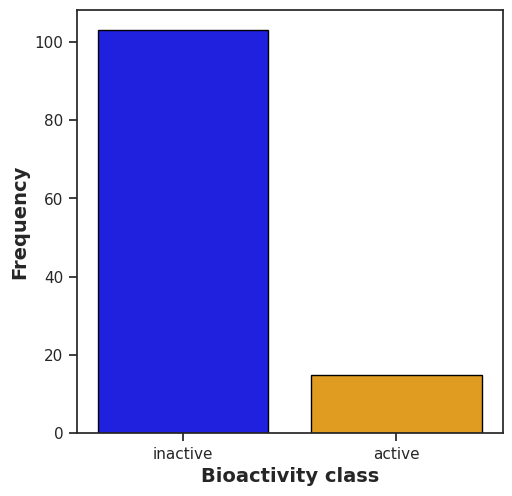

In [170]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_two_class, edgecolor='black', palette=['blue', 'orange'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

##Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

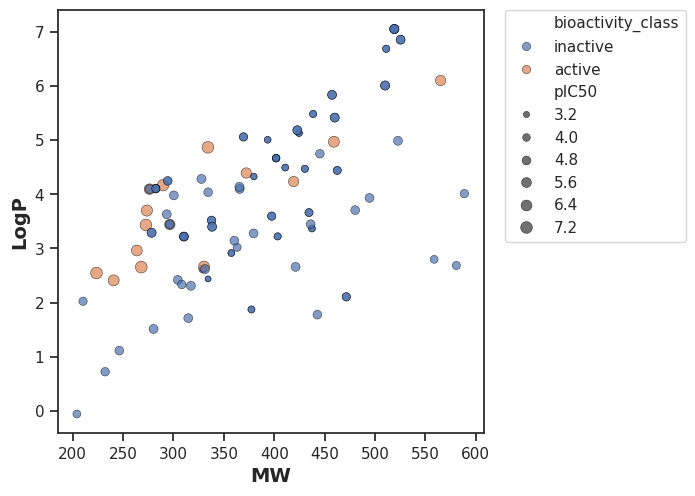

In [157]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_two_class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

##Box plots
**pIC50 value**

<ipython-input-172-4deb16e97d4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_two_class, palette=['blue', 'orange'])


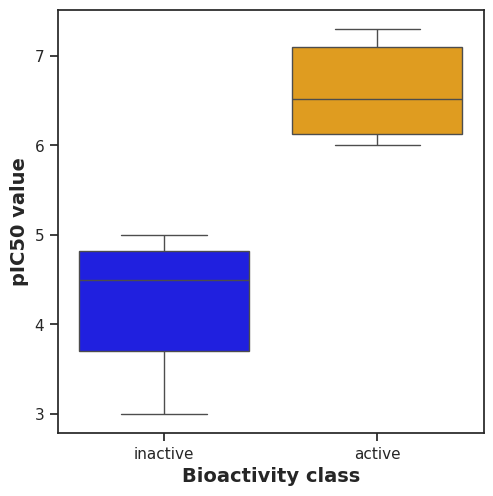

In [172]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_two_class, palette=['blue', 'orange'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


##**Statistical analysis | Mann-Whitney U Test**

In [159]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_two_class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_two_class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [160]:
mannwhitney('pIC50')

Descriptor  Statistics             p  alpha  \
0      pIC50      1545.0  4.428384e-10   0.05   

                       Interpretation  
0  Different distribution (reject H0)

**MW**

<ipython-input-173-3a9bdd71699e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_two_class, palette=['blue', 'orange'])


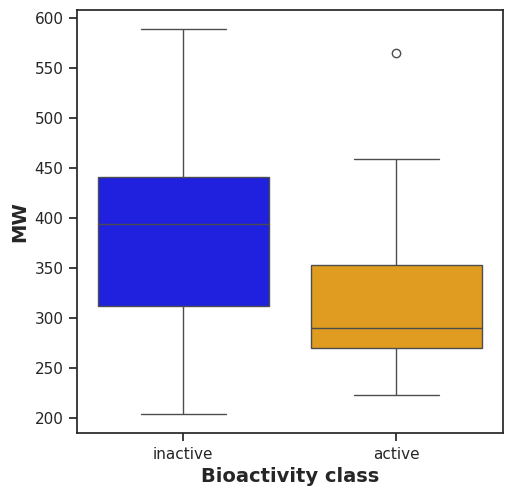

In [173]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_two_class, palette=['blue', 'orange'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [162]:
mannwhitney('MW')

Descriptor  Statistics         p  alpha                      Interpretation
0         MW       408.5  0.003313   0.05  Different distribution (reject H0)

**LogP**

<ipython-input-176-e6ac3de15d2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_two_class, palette=['blue', 'orange'])


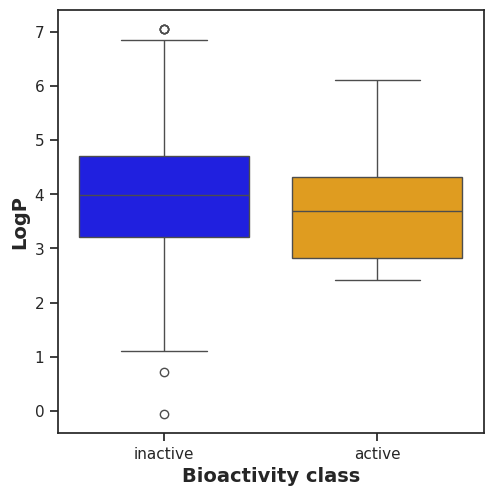

In [176]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_two_class, palette=['blue', 'orange'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [164]:
mannwhitney('LogP')

Descriptor  Statistics         p  alpha  \
0       LogP       712.5  0.630683   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

**NumHDonors**

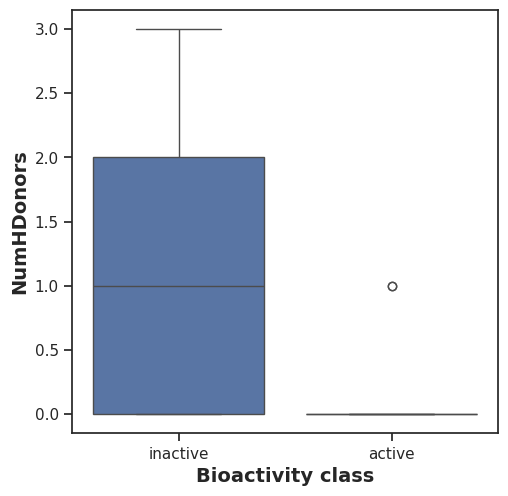

In [165]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_two_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [166]:
mannwhitney('NumHDonors')

Descriptor  Statistics         p  alpha                      Interpretation
0  NumHDonors       298.5  0.000053   0.05  Different distribution (reject H0)

 **NumHAcceptors**


<ipython-input-177-1ee5b13fa008>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_two_class, palette=['blue', 'orange'])


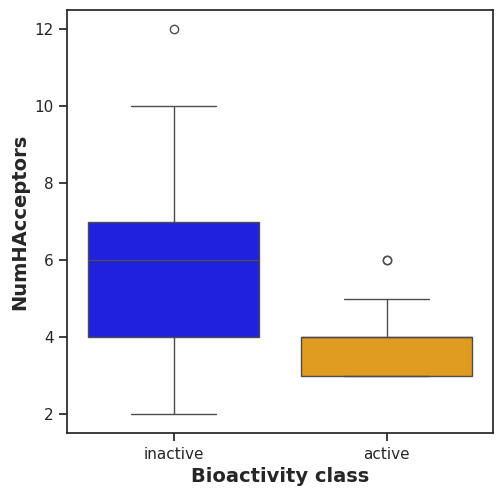

In [177]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_two_class, palette=['blue', 'orange'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [168]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics         p  alpha  \
0  NumHAcceptors       414.0  0.003402   0.05   

                       Interpretation  
0  Different distribution (reject H0)

**Interpretation of Statistical Results**

Box Plots

**pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

##**Zip files**

In [178]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: mannwhitneyu_NumHDonors.csv (deflated 9%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_MW.pdf (deflated 37%)
updating: plot_LogP.pdf (deflated 38%)
updating: bioactivity_data.csv (deflated 90%)
updating: bioactivity_preprocessed_data.csv (deflated 80%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_MW_vs_LogP.pdf (deflated 15%)
updating: plot_ic50.pdf (deflated 37%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)


##**Download PaDEL-Descriptor**

In [179]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-02-22 23:29:09--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-02-22 23:29:09--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   147MB/s    in 0.2s    

2024-02-22 23:29:09 (147 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-02-22 23:29:10--  https://github

In [180]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

**Load bioactivity data**

In [184]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv



--2024-02-22 23:47:05--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.04s   

2024-02-22 23:47:05 (14.4 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’ saved [655414/655414]



In [186]:
df3 = pd.read_csv('/content/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df3

Unnamed: 0 molecule_chembl_id  \
0              0       CHEMBL133897   
1              1       CHEMBL336398   
2              2       CHEMBL131588   
3              3       CHEMBL130628   
4              4       CHEMBL130478   
...          ...                ...   
4690        4690      CHEMBL4293155   
4691        4691      CHEMBL4282558   
4692        4692      CHEMBL4281727   
4693        4693      CHEMBL4292349   
4694        4694      CHEMBL4278260   

                                       canonical_smiles         class  \
0                 CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1        active   
1            O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1        active   
2     CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1      inactive   
3         O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F        active   
4             CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C        active   
...                                                 ...           ...   
4690  CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...  intermediate   
4691  CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...  intermediate   
4692  CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...  intermediate   
4693  CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...  intermediate   
4694  CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(C#N)cc3...  intermediate   

           MW     LogP  NumHDonors  NumHAcceptors     pIC50  
0     312.325  2.80320         0.0            6.0  6.124939  
1     376.913  4.55460         0.0            5.0  7.000000  
2     426.851  5.35740         0.0            5.0  4.301030  
3     404.845  4.70690         0.0            5.0  6.522879  
4     346.334  3.09530         0.0            6.0  6.096910  
...       ...      ...         ...            ...       ...  
4690  511.150  7.07230         2.0            3.0  5.612610  
4691  511.150  7.07230         2.0            3.0  5.595166  
4692  555.601  7.18140         2.0            3.0  5.419075  
4693  521.702  6.32710         2.0            5.0  5.460924  
4694  501.715  6.29058         2.0            4.0  5.555955  

[4695 rows x 9 columns]

In [187]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [188]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [189]:
! cat molecule.smi | wc -l

4695


##**Calculate fingerprint descriptors**
**Calculate PaDEL descriptors**

In [190]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [191]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/4695). 
Processing CHEMBL336398 in molecule.smi (2/4695). 
Processing CHEMBL131588 in molecule.smi (3/4695). Average speed: 8.59 s/mol.
Processing CHEMBL130628 in molecule.smi (4/4695). Average speed: 4.38 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4695). Average speed: 3.22 s/mol.
Processing CHEMBL130098 in molecule.smi (7/4695). Average speed: 2.01 s/mol.
Processing CHEMBL130112 in molecule.smi (6/4695). Average speed: 2.46 s/mol.
Processing CHEMBL337486 in molecule.smi (8/4695). Average speed: 1.77 s/mol.
Processing CHEMBL336538 in molecule.smi (9/4695). Average speed: 1.56 s/mol.
Processing CHEMBL341437 in molecule.smi (11/4695). Average speed: 1.31 s/mol.
Processing CHEMBL131051 in molecule.smi (10/4695). Average speed: 1.44 s/mol.
Processing CHEMBL335033 in molecule.smi (12/4695). Average speed: 1.24 s/mol.
Processing CHEMBL122983 in molecule.smi (13/4695). Average speed: 1.13 s/mol.
Processing CHEMBL338720 in molecule.smi (14/469

In [192]:
! ls -l

total 117716
-rw-r--r-- 1 root root   655414 Feb 22 23:47 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root    17145 Feb 22 23:41 bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root    68403 Feb 22 20:14 bioactivity_data.csv
-rw-r--r-- 1 root root    10341 Feb 22 20:54 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root  8356701 Feb 23 00:26 descriptors_output.csv
drwx------ 5 root root     4096 Feb 22 20:15 gdrive
drwxr-xr-x 3 root root     4096 Feb 22 23:30 __MACOSX
-rw-r--r-- 1 root root      121 Feb 22 22:43 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Feb 22 22:41 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Feb 22 22:46 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      127 Feb 22 22:44 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      123 Feb 22 22:40 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   310658 Feb 22 23:48 molecule.

## **Preparing the X and Y Data Matrices**
**X data matrix**

In [193]:
df3_X = pd.read_csv('/content/descriptors_output.csv')

In [194]:
df3_X

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL336398           1           1           1           0   
1      CHEMBL133897           1           1           1           0   
2      CHEMBL130628           1           1           1           0   
3      CHEMBL131588           1           1           0           0   
4      CHEMBL130478           1           1           0           0   
...             ...         ...         ...         ...         ...   
4690  CHEMBL4293155           1           1           1           1   
4691  CHEMBL4282558           1           1           1           1   
4692  CHEMBL4281727           1           1           1           1   
4693  CHEMBL4292349           1           1           1           1   
4694  CHEMBL4278260           1           1           1           1   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
4690           0           0           0           0           0           1   
4691           0           0           0           0           0           1   
4692           0           0           0           0           0           1   
4693           0           0           0           0           0           1   
4694           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            0            0            1   
...           ...          ...          ...          ...          ...   
4690            1            1            1            0            1   
4691            1            1            1            0            1   
4692            1            1            1            0            1   
4693            1            1            1            0            1   
4694            1            1            1            1            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            1            0            1            0   
1               1            0            0            1            1   
2               1            1            0            1            0   
3               1            1            0            1            0   
4               1            1            0            1            1   
...           ...          ...          ...          ...          ...   
4690            1            0            0            1            1   
4691            1            0            0            1            1   
4692            1            0            0            1            1   
4693            1            0            0            1            1   
4694            1            0            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               0            0            0            0            0   
1               1            0            0            0            0   
2               0            0            0            1            1   
3               0            0            0            1            1   
4               0            0            0            1            1   
...      

In [195]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0              0           0           0           1            1   
1              0           0           0           1            1   
2              0           0           0           1            1   
3              0           0           0           1            1   
4              0           0           0           1            1   
...          ...         ...         ...         ...          ...   
4690           0           0           0           1            1   
4691           0           0           0           1            1   
4692           0           0           0           1            1   
4693           0           0           0           1            1   
4694           0           0           0           1            1   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0               1            1            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            1   
3               1            1            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
4690            1            1            0            1            1   
4691            1            1            0            1            1   
4692            1            1            0            1            1   
4693            1            1            0            1            1   
4694            1            1            1            1            1   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0               1            0            1            0            0   
1               0            0            1            1            1   
2               1            0            1            0            0   
3               1            0            1            0            0   
4               1            0            1            1            0   
...           ...          ...          ...          ...          ...   
4690            0            0            1            1            0   
4691            0            0            1            1            0   
4692            0            0            1            1            0   
4693            0            0            1            1            1   
4694            0            0            1            1            0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            1            1            0   
3               0            0            1            1            0   
4               0            0            1            1            0   
...           ...       

##**Y variable**
**Convert IC50 to pIC50**

In [196]:
df3_Y = df3['pIC50']
df3_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

##**Combining X and Y variable**

In [197]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0              0           0           0           1            1   
1              0           0           0           1            1   
2              0           0           0           1            1   
3              0           0           0           1            1   
4              0           0           0           1            1   
...          ...         ...         ...         ...          ...   
4690           0           0           0           1            1   
4691           0           0           0           1            1   
4692           0           0           0           1            1   
4693           0           0           0           1            1   
4694           0           0           0           1            1   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0               1            1            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            1   
3               1            1            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
4690            1            1            0            1            1   
4691            1            1            0            1            1   
4692            1            1            0            1            1   
4693            1            1            0            1            1   
4694            1            1            1            1            1   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0               1            0            1            0            0   
1               0            0            1            1            1   
2               1            0            1            0            0   
3               1            0            1            0            0   
4               1            0            1            1            0   
...           ...          ...          ...          ...          ...   
4690            0            0            1            1            0   
4691            0            0            1            1            0   
4692            0            0            1            1            0   
4693            0            0            1            1            1   
4694            0            0            1            1            0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            1            1            0   
3               0            0            1            1            0   
4               0            0            1            1            0   
...           ...       

In [198]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [200]:
df = pd.read_csv('/content/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

##**Input features**
The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

In [201]:
X = df.drop('pIC50', axis=1)
X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0              0           0           0           1            1   
1              0           0           0           1            1   
2              0           0           0           1            1   
3              0           0           0           1            1   
4              0           0           0           1            1   
...          ...         ...         ...         ...          ...   
4690           0           0           0           1            1   
4691           0           0           0           1            1   
4692           0           0           0           1            1   
4693           0           0           0           1            1   
4694           0           0           0           1            1   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0               1            1            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            1   
3               1            1            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
4690            1            1            0            1            1   
4691            1            1            0            1            1   
4692            1            1            0            1            1   
4693            1            1            0            1            1   
4694            1            1            1            1            1   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0               1            0            1            0            0   
1               0            0            1            1            1   
2               1            0            1            0            0   
3               1            0            1            0            0   
4               1            0            1            1            0   
...           ...          ...          ...          ...          ...   
4690            0            0            1            1            0   
4691            0            0            1            1            0   
4692            0            0            1            1            0   
4693            0            0            1            1            1   
4694            0            0            1            1            0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            1            1            0   
3               0            0            1            1            0   
4               0            0            1            1            0   
...           ...       

##**Output features**

In [202]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [203]:
X.shape

(4695, 881)

In [204]:
Y.shape

(4695,)

In [205]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [206]:
X.shape

(4695, 137)

In [207]:
# Data split (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [208]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [209]:
X_test.shape, Y_test.shape

((939, 137), (939,))

In [210]:
# Building a Regression Model using Random Forest
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5322115781118082

In [211]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

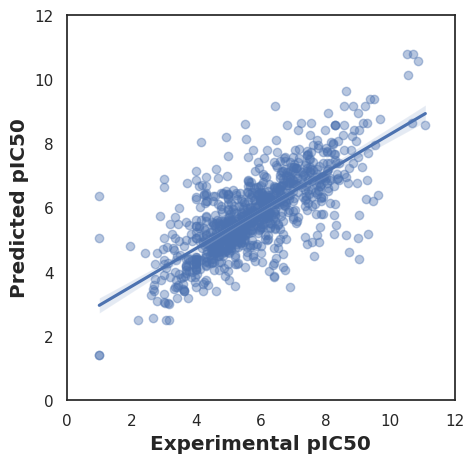

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

##**Comparing Regressors**

In [217]:
!pip install --upgrade pip setuptools wheel

     |████████████████████████████████| 2.1 MB 5.0 MB/s 
     |████████████████████████████████| 804 kB 54.2 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0.post20200210
    Uninstalling setuptools-45.2.0.post20200210:
      Successfully uninstalled setuptools-45.2.0.post20200210
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2


In [218]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.5 MB/s eta 0:00:00


In [219]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [220]:
df = pd.read_csv('/content/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [221]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [222]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [223]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##**Compare ML algorithms**

In [224]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:59<00:00,  1.01it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [01:00<00:00,  1.44s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:51<00:00,  1.43it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:52<00:00,  1.24s/it]


In [225]:
# Performance table of the training set (80% subset)
predictions_train

Adjusted R-Squared  \
Model                                                         
DecisionTreeRegressor                                  0.87   
ExtraTreeRegressor                                     0.87   
ExtraTreesRegressor                                    0.87   
GaussianProcessRegressor                               0.87   
RandomForestRegressor                                  0.83   
XGBRegressor                                           0.83   
BaggingRegressor                                       0.82   
MLPRegressor                                           0.78   
HistGradientBoostingRegressor                          0.68   
LGBMRegressor                                          0.65   
KNeighborsRegressor                                    0.64   
SVR                                                    0.57   
NuSVR                                                  0.56   
GradientBoostingRegressor                              0.44   
Ridge                                                  0.31   
TransformedTargetRegressor                             0.31   
LinearRegression                                       0.31   
LassoLarsIC                                            0.31   
LassoCV                                                0.31   
ElasticNetCV                                           0.31   
RidgeCV                                                0.31   
LassoLarsCV                                            0.30   
BayesianRidge                                          0.30   
HuberRegressor                                         0.30   
LinearSVR                                              0.28   
SGDRegressor                                           0.27   
PoissonRegressor                                       0.26   
AdaBoostRegressor                                      0.21   
OrthogonalMatchingPursuitCV                            0.20   
OrthogonalMatchingPursuit                              0.20   
LarsCV                                                 0.19   
TweedieRegressor                                       0.19   
GammaRegressor                                         0.19   
Lasso                                                 -0.04   
ElasticNet                                            -0.04   
DummyRegressor                                        -0.04   
LassoLars                                             -0.04   
PassiveAggressiveRegressor                            -0.49   
KernelRidge                                          -14.25   
Lars                                                 -85.36   
RANSACRegressor               -1020287463713839509405696.00   

                                                 R-Squared             RMSE  \
Model                                                                         
DecisionTreeRegressor                                 0.87             0.55   
ExtraTreeRegressor                                    0.87             0.55   
ExtraTreesRegressor                                   0.87             0.55   
GaussianProcessRegressor                              0.87             0.55   
RandomForestRegressor                                 0.84             0.63   
XGBRegressor                                          0.84             0.63   
BaggingRegressor                                      0.82             0.65   
MLPRegressor                                          0.79             0.72   
HistGradientBoostingRegressor                         0.69             0.86   
LGBMRegressor                                         0.67             0.90   
KNeighborsRegressor                                   0.65             0.92   
SVR                                                   0.58             1.00   
NuSVR                                                 0.57             1.02   
GradientBoostingRegressor                             0.46             1.14   
Ridge                                                 0.34         

In [226]:
# Performance table of the test set (20% subset)
predictions_test

Adjusted R-Squared  \
Model                                                        
HistGradientBoostingRegressor                         0.48   
RandomForestRegressor                                 0.47   
XGBRegressor                                          0.46   
LGBMRegressor                                         0.46   
BaggingRegressor                                      0.43   
MLPRegressor                                          0.42   
SVR                                                   0.41   
NuSVR                                                 0.40   
KNeighborsRegressor                                   0.39   
GradientBoostingRegressor                             0.33   
ExtraTreesRegressor                                   0.23   
Ridge                                                 0.20   
RidgeCV                                               0.20   
ElasticNetCV                                          0.20   
DecisionTreeRegressor                                 0.20   
LassoCV                                               0.20   
LassoLarsIC                                           0.20   
TransformedTargetRegressor                            0.20   
LinearRegression                                      0.20   
LassoLarsCV                                           0.20   
BayesianRidge                                         0.20   
HuberRegressor                                        0.19   
ExtraTreeRegressor                                    0.18   
SGDRegressor                                          0.18   
LinearSVR                                             0.17   
PoissonRegressor                                      0.17   
OrthogonalMatchingPursuit                             0.10   
OrthogonalMatchingPursuitCV                           0.10   
LarsCV                                                0.09   
GammaRegressor                                        0.09   
AdaBoostRegressor                                     0.09   
TweedieRegressor                                      0.09   
Lasso                                                -0.17   
ElasticNet                                           -0.17   
DummyRegressor                                       -0.17   
LassoLars                                            -0.17   
PassiveAggressiveRegressor                           -0.59   
GaussianProcessRegressor                             -5.92   
KernelRidge                                         -16.41   
Lars                                                -84.59   
RANSACRegressor               -839466220653019897266176.00   

                                                 R-Squared             RMSE  \
Model                                                                         
HistGradientBoostingRegressor                         0.56             1.04   
RandomForestRegressor                                 0.54             1.05   
XGBRegressor                                          0.54             1.06   
LGBMRegressor                                         0.54             1.06   
BaggingRegressor                                      0.51             1.09   
MLPRegressor                                          0.50             1.09   
SVR                                                   0.49             1.11   
NuSVR                                                 0.49             1.11   
KNeighborsRegressor                                   0.48             1.12   
GradientBoostingRegressor                             0.43             1.17   
ExtraTreesRegressor                                   0.34             1.26   
Ridge                                                 0.32             1.28   
RidgeCV                                               0.32             1.28   
ElasticNetCV                                          0.32             1.28   
DecisionTreeRegressor                                 0.32             1.28   
LassoCV                       

[(0.0, 1.0)]

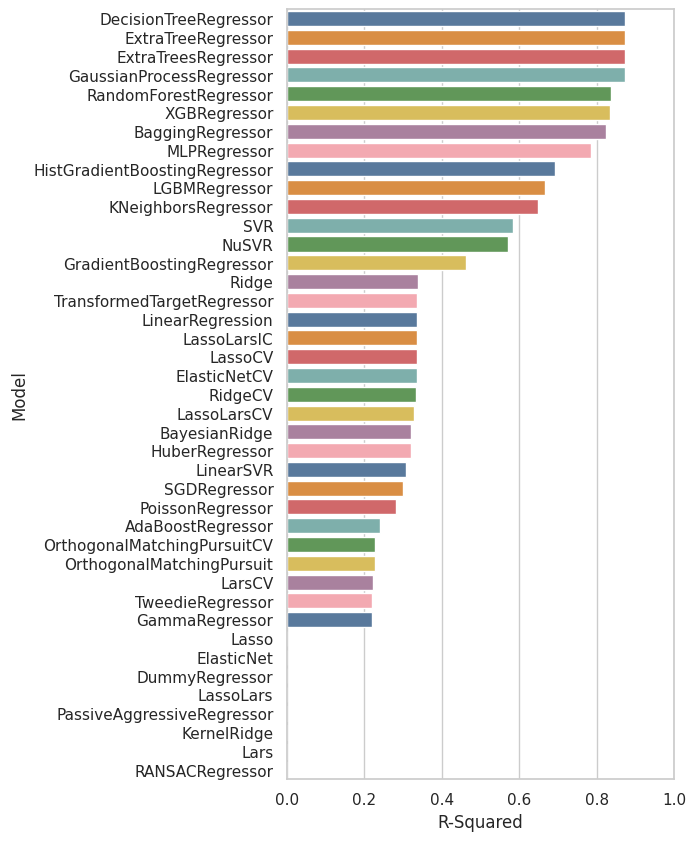

In [232]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
# sns.set_theme(style="whitegrid")
custom_palette = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948', '#b07aa1', '#ff9da7']
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, palette=custom_palette)
# ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))


[(0.0, 10.0)]

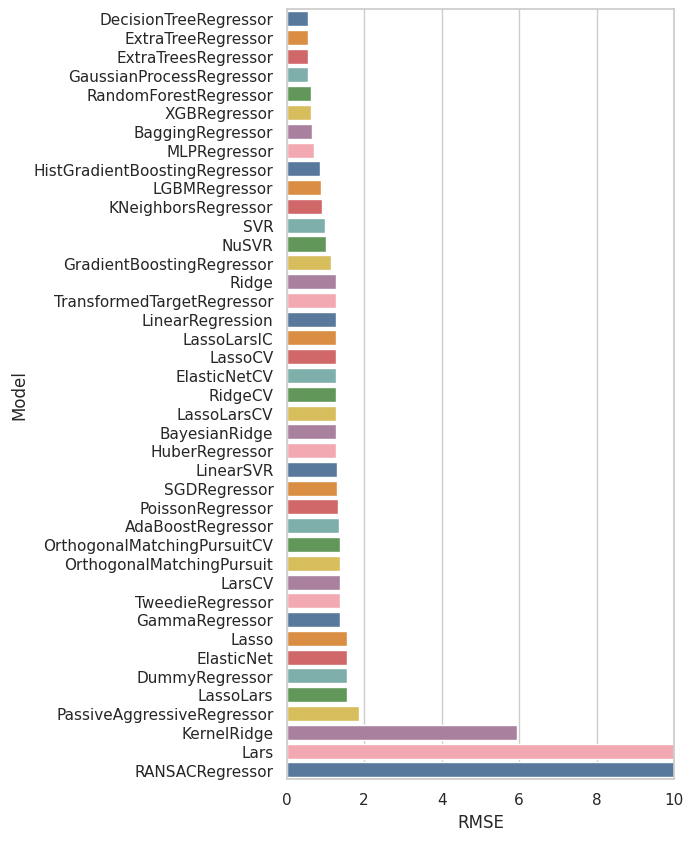

In [235]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, palette=custom_palette)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

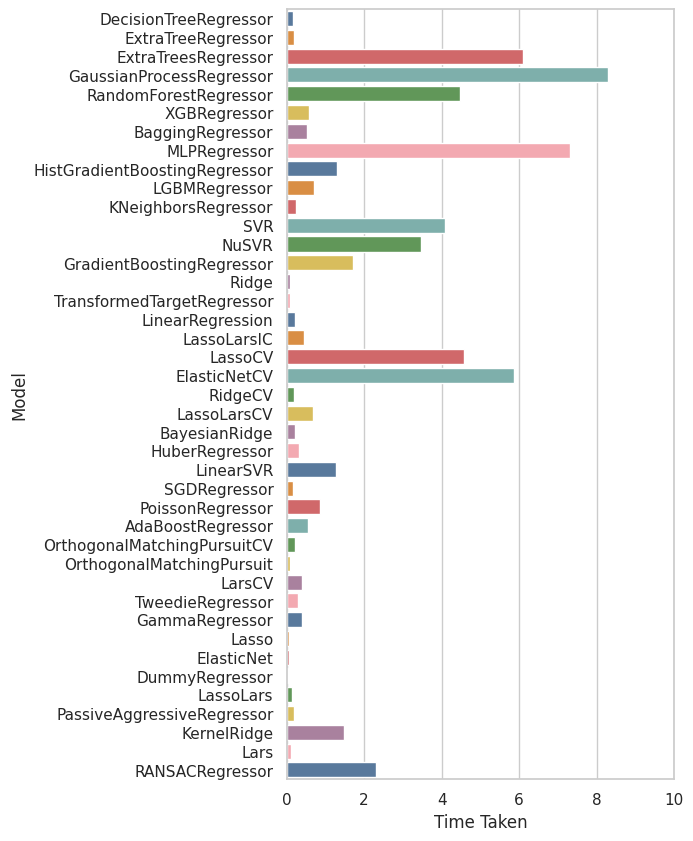

In [234]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, palette=custom_palette)
ax.set(xlim=(0, 10))